# Arrows and paths on the Smith chart

For engineering communication (and teaching), it is often helpful to show:

- direction of motion (e.g., along a transmission line),
- step-by-step matching transformations,
- “start” and “end” points with clear annotations.

This notebook shows practical patterns for drawing **paths**, **directionality**, and **callouts** on Smith charts using Matplotlib plus `pysmithchart`.

Notes:
- `ax.plot(...)` is used for the path.
- Arrows can be added using `ax.annotate(...)`.
- For text that should not depend on impedance/Γ units, use `transform=ax.transAxes`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pysmithchart
from pysmithchart.constants import REFLECTANCE_DOMAIN, IMPEDANCE_DOMAIN

## 1. A simple “direction along a path” arrow

A robust way to indicate direction is:

1. Plot the full path with `ax.plot(...)`.
2. Choose one or more points along the path and use `ax.annotate(..., arrowprops=...)`.

This avoids relying on special arrow-plotting helpers and works in any domain.

AttributeError: Line2D.set() got an unexpected keyword argument 'plot_every'

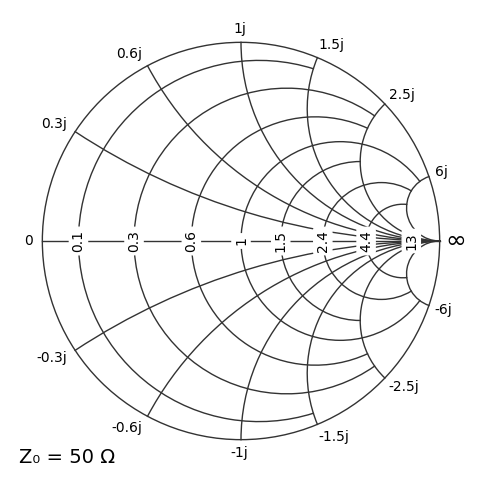

In [5]:
# Example path: rotate a reflection coefficient along a lossless line
Gamma_L = 0.6 * np.exp(1j * np.deg2rad(120))
l_over_lambda = np.linspace(0, 0.5, 300)
Gamma = Gamma_L * np.exp(-1j * 4 * np.pi * l_over_lambda)

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", domain=REFLECTANCE_DOMAIN)

ax.plot(Gamma, label=r"$\Gamma(\ell)$", plot_every=5)
ax.plot([Gamma[0]], "o", label="start")
ax.plot([Gamma[-1]], "o", label="end")

# Arrow pointing from one sample to a later sample
i0, i1 = 80, 140
ax.annotate(
    "",
    xy=(Gamma[i1].real, Gamma[i1].imag),
    xytext=(Gamma[i0].real, Gamma[i0].imag),
    arrowprops=dict(arrowstyle="->", lw=2),
)

ax.legend(loc="upper right")
ax.set_title("Adding a direction arrow with annotate() (Γ domain)")
plt.show()

## 2. Multiple arrows along a curve (visual “flow”)

For longer paths, multiple arrows can improve readability.
A simple pattern is to place arrows every *N* samples.

In [ ]:
plt.figure(figsize=(6, 6))
sc = {
    "domain": REFLECTANCE_DOMAIN,
}
ax = plt.subplot(111, projection="smith", domain=REFLECTANCE_DOMAIN, projection="smith", **sc)

ax.plot(Gamma, label=r"$\Gamma(l)$")

step = 60
for i in range(step, len(Gamma), step):
    ax.annotate(
        "",
        xy=(Gamma[i].real, Gamma[i].imag),
        xytext=(Gamma[i - step].real, Gamma[i - step].imag),
        arrowprops=dict(arrowstyle="->", lw=1.5),
    )

ax.legend(loc="upper right")
ax.set_title("Multiple arrows along a path")
plt.show()

## 3. Step-by-step matching path (conceptual example)

Many matching workflows can be presented as a sequence of intermediate impedances.

This section shows the plotting pattern (points + connecting segments + labels).
The values below are *example impedances* meant to illustrate the technique.

In [ ]:
Z0 = 50

# Example steps (ohms): start -> intermediate -> final
Z_steps = np.array(
    [
        100 + 1j * 40,  # start
        60 + 1j * 10,  # after a matching element
        50 + 0j,  # match
    ]
)

plt.figure(figsize=(6, 6))
sc = {
    "Z0": Z0,
    "domain": IMPEDANCE_DOMAIN,
}
ax = plt.subplot(111, projection="smith", Z0=Z0, domain=IMPEDANCE_DOMAIN, projection="smith", **sc)

ax.plot(Z_steps, marker="o", linestyle="--", label="matching steps")

labels = ["Start", "Step 1", "Match"]
for Zi, s in zip(Z_steps, labels):
    ax.text(Zi.real + 3, Zi.imag + 3, s)

# Direction arrow for the overall transformation
ax.annotate(
    "",
    xy=(Z_steps[-1].real, Z_steps[-1].imag),
    xytext=(Z_steps[0].real, Z_steps[0].imag),
    arrowprops=dict(arrowstyle="->", lw=2),
)

ax.legend(loc="upper right")
ax.set_title("Step-by-step path (impedance domain, ohms)")
plt.show()

## 4. Callouts that do not depend on the plotting domain

When you want explanatory text to sit in a fixed place on the chart (like a figure caption),
use axes coordinates:

```python
ax.text(..., transform=ax.transAxes)
```

This is independent of impedance/Γ units and independent of the active domain.

In [ ]:
plt.figure(figsize=(6, 6))
sc = {
    "Z0": Z0,
    "domain": IMPEDANCE_DOMAIN,
}
ax = plt.subplot(111, projection="smith", Z0=Z0, domain=IMPEDANCE_DOMAIN, projection="smith", **sc)

ax.plot(Z_steps, marker="o", linestyle="--", label="matching steps")
ax.legend(loc="upper right")

ax.text(
    0.02,
    0.98,
    "Example: annotate steps with arrows\nText placed using ax.transAxes",
    transform=ax.transAxes,
    ha="left",
    va="top",
)

ax.set_title("Domain-independent callouts using transform=ax.transAxes")
plt.show()

## 5. A practical template you can reuse

For many figures, a good reusable structure is:

1. Create axes
2. Plot path(s)
3. Plot key points
4. Add arrows with `annotate`
5. Add labels with `text`
6. Add a domain-independent caption (optional)

The code cell below is a compact template.

In [ ]:
plt.figure(figsize=(6, 6))
sc = {
    "domain": REFLECTANCE_DOMAIN,
}
ax = plt.subplot(111, projection="smith", domain=REFLECTANCE_DOMAIN, projection="smith", **sc)

# 1) data
G = Gamma

# 2) main path
ax.plot(G, label="path")

# 3) endpoints
ax.plot([G[0]], "o", label="start")
ax.plot([G[-1]], "o", label="end")

# 4) a direction arrow
k0, k1 = len(G) // 3, len(G) // 3 + 40
ax.annotate(
    "",
    xy=(G[k1].real, G[k1].imag),
    xytext=(G[k0].real, G[k0].imag),
    arrowprops=dict(arrowstyle="->", lw=2),
)

# 5) label points (domain coords)
ax.text(G[0].real + 0.03, G[0].imag + 0.03, "start")
ax.text(G[-1].real + 0.03, G[-1].imag + 0.03, "end")

# 6) caption (axes coords)
ax.text(0.02, 0.02, "REFLECTANCE_DOMAIN (Γ)", transform=ax.transAxes, ha="left", va="bottom")

ax.legend(loc="upper right")
ax.set_title("Reusable plotting template: paths + arrows + labels")
plt.show()

## Summary

- Plot paths with `ax.plot(...)`.
- Add directionality with `ax.annotate(..., arrowprops=...)`.
- Use `ax.text(...)` for labels in *domain coordinates*.
- Use `transform=ax.transAxes` for callouts anchored to the chart frame.

Next recommended notebook: **impedance_matching_examples**.